In [9]:
import numpy as np
import matplotlib
import scipy as sc
from pylab import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime as datet
import wget
from netCDF4 import Dataset
from palettable.colorbrewer.sequential import YlGn_9

In [10]:
#On recupere les donnees représentant les précipitation en janvier 1950

url="http://esgf-data3.ceda.ac.uk/thredds/fileServer/esg_cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-LM/highresSST-present/r1i1p1f1/Amon/pr/gn/v20170906/pr_Amon_HadGEM3-GC31-LM_highresSST-present_r1i1p1f1_gn_195001-195012.nc"
filename=wget.download(url)
dataset = Dataset(filename)

In [11]:
#On charge les variables dans des tableaux numpy
pr=dataset.variables['pr'][:]
pr = np.ma.array (pr, mask=np.isnan(pr))
lon=dataset.variables['lon'][:]
lat=dataset.variables['lat'][:]
time=dataset.variables['time'][:]

In [12]:
#On reajuste la longitude entre -180 et 180
pr, lon = shiftgrid(180., pr, lon, start=False) #pr+ lon from [-180,180E]

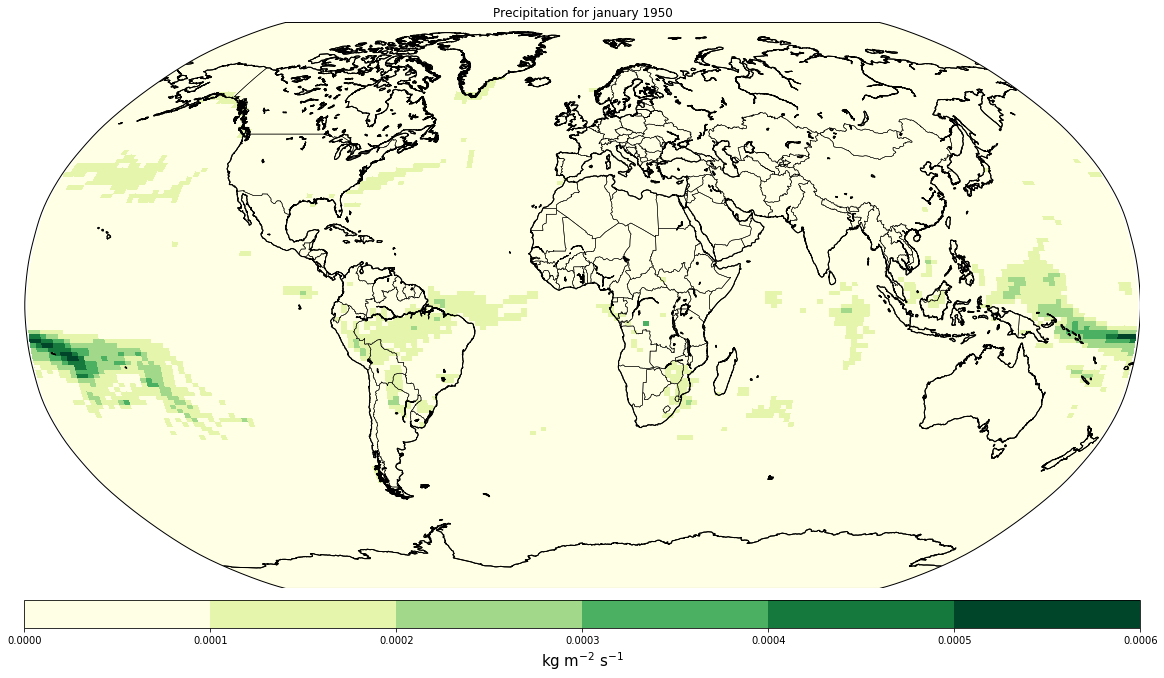

AttributeError: 'Figure' object has no attribute 'save'

In [16]:
#On crée la figure
fig = plt.figure(figsize=(20,20))

llcrnrlon=-180
urcrnrlon=180

#On cree la basemap -180 - 180
m = Basemap(llcrnrlon=llcrnrlon,llcrnrlat=-60,urcrnrlon=urcrnrlon,urcrnrlat=60,\
                rsphere=(6378137.00,6356752.3142),\
               resolution='l',projection='robin',\
               lat_0=0,lon_0=0,lat_ts=10)


# On affiche sur la map les frontieres des pays et des oceans
m.drawcoastlines()
m.drawcountries()

#retourne une grid 2D
lata, lona= np.meshgrid(lat, lon)
xi, yi = m(lona, lata)

#La couleur correspond au couleurs des precipitation recommandee par SSIP
cmap = YlGn_9.mpl_colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
            'Custom cmap', cmaplist, cmap.N)
bounds = np.arange(np.min(np.squeeze(pr[1])), np.max(np.squeeze(pr[1])), .0001)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# On utilise un pcolormash pour afficher les données du mois de janvier
cs = m.pcolormesh(xi,yi,np.transpose(np.squeeze(pr[1])), cmap=cmap, norm=norm)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="2%")

#Ajout de la legende et du titre
cbar.set_label(r'kg m$^{-2}$ s$^{-1}$',fontsize=15)
plt.title('Precipitation for january 1950')

#On affiche le figure
plt.show()

fig.save("precipitation_1950.png")